In [245]:
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
import requests
from bs4 import BeautifulSoup
from seleniumbase import Driver
from selenium.webdriver.common.by import By
import time
import pandas as pd
import numpy as np

job_data = []

driver = Driver()

for i in range(2,52):
    url = f'https://www.naukri.com/data-science-jobs{-i}?k=data%20science'
    driver.get(url)

    driver.implicitly_wait(20)
    job_wrappers = driver.find_elements(By.CLASS_NAME, "srp-jobtuple-wrapper")

    for job in job_wrappers:
        try:
            title = job.find_element(By.CLASS_NAME, "title").text
        except Exception as e:
            title = np.nan
        try:
            cname_rating_rev = job.find_element(By.CLASS_NAME,"row2").text.split('\n')
            company_name = cname_rating_rev[0]
        except Exception as e:
            company_name = np.nan
        try:
            rating = cname_rating_rev[1]
        except Exception as e:
            rating = np.nan
        try:
            reviews = cname_rating_rev[2]
        except Exception as e:
            reviews = np.nan
            
        try:
            exp_sal_loc = job.find_element(By.CLASS_NAME, 'row3').text.split("\n")
            exp = exp_sal_loc[0]
        except Exception as e:
            exp = np.nan
        try:    
            sal = exp_sal_loc[1]
        except Exception as e:
            sal = np.nan
        try:
            loc = exp_sal_loc[-1]
        except Exception as e:
            loc = np.nan

        job_data.append({
            'Title': title,
            'Company Name': company_name,
            'Rating': rating,
            'Reviews': reviews,
            'Experience': exp,
            'Salary': sal,
            'Location': loc
        })
time.sleep(15)
        
driver.close()


In [172]:
df = pd.DataFrame(job_data)
df.head()


,Title,Company Name,Rating,Reviews,Experience,Salary,Location
0,Data Engineer For Data Science,Agilite Global Solutions,4.6,3 Reviews,5-7 Yrs,Not disclosed,Remote
1,Data Science (Generative AI) - Senior Manager ...,PwC,3.6,6413 Reviews,12-20 Yrs,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru"
2,Data Science Consultant,Blue Yonder,4.2,392 Reviews,5-10 Yrs,Not disclosed,Bangalore/Bengaluru
3,Consultant - Data Science DT,Eli Lilly And Company,4.2,320 Reviews,1-5 Yrs,Not disclosed,Bangalore/Bengaluru
4,Analyst - Data Science,Marsh McLennan Companies,4.1,465 Reviews,1-3 Yrs,Not disclosed,Mumbai


In [173]:
df.shape

(957, 7)

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957 entries, 0 to 956
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         957 non-null    object
 1   Company Name  957 non-null    object
 2   Rating        683 non-null    object
 3   Reviews       683 non-null    object
 4   Experience    957 non-null    object
 5   Salary        957 non-null    object
 6   Location      957 non-null    object
dtypes: object(7)
memory usage: 52.5+ KB


In [175]:
top_10_employers = df['Company Name'].value_counts()[:10]
top_10_employers

Skillety                18
Siemens                 13
Tiger Analytics         12
Coders Brain Pvt Ltd    11
Response Informatics    10
Deutsche Bank            7
TVS Motor                7
Aspyra Hr Services       7
Essenware                6
IBM                      6
Name: Company Name, dtype: int64

In [176]:
df['Reviews'].isna().sum()

274

In [177]:
df[['review', 'text']] = df['Reviews'].str.split(' ', 1, expand=True)

In [178]:
df.head()

,Title,Company Name,Rating,Reviews,Experience,Salary,Location,review,text
0,Data Engineer For Data Science,Agilite Global Solutions,4.6,3 Reviews,5-7 Yrs,Not disclosed,Remote,3,Reviews
1,Data Science (Generative AI) - Senior Manager ...,PwC,3.6,6413 Reviews,12-20 Yrs,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",6413,Reviews
2,Data Science Consultant,Blue Yonder,4.2,392 Reviews,5-10 Yrs,Not disclosed,Bangalore/Bengaluru,392,Reviews
3,Consultant - Data Science DT,Eli Lilly And Company,4.2,320 Reviews,1-5 Yrs,Not disclosed,Bangalore/Bengaluru,320,Reviews
4,Analyst - Data Science,Marsh McLennan Companies,4.1,465 Reviews,1-3 Yrs,Not disclosed,Mumbai,465,Reviews


In [179]:
df = df.drop(['Reviews', 'text'], axis=1)

In [180]:
df.head()

,Title,Company Name,Rating,Experience,Salary,Location,review
0,Data Engineer For Data Science,Agilite Global Solutions,4.6,5-7 Yrs,Not disclosed,Remote,3
1,Data Science (Generative AI) - Senior Manager ...,PwC,3.6,12-20 Yrs,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",6413
2,Data Science Consultant,Blue Yonder,4.2,5-10 Yrs,Not disclosed,Bangalore/Bengaluru,392
3,Consultant - Data Science DT,Eli Lilly And Company,4.2,1-5 Yrs,Not disclosed,Bangalore/Bengaluru,320
4,Analyst - Data Science,Marsh McLennan Companies,4.1,1-3 Yrs,Not disclosed,Mumbai,465


In [ ]:
df[['review', 'text']] = df['Reviews'].str.split(' ', 1, expand=True)

In [181]:
df[['min_exp', 'txt']] = df['Experience'].str.split('-', 1, expand = True)

In [182]:
df.head()

,Title,Company Name,Rating,Experience,Salary,Location,review,min_exp,txt
0,Data Engineer For Data Science,Agilite Global Solutions,4.6,5-7 Yrs,Not disclosed,Remote,3,5,7 Yrs
1,Data Science (Generative AI) - Senior Manager ...,PwC,3.6,12-20 Yrs,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",6413,12,20 Yrs
2,Data Science Consultant,Blue Yonder,4.2,5-10 Yrs,Not disclosed,Bangalore/Bengaluru,392,5,10 Yrs
3,Consultant - Data Science DT,Eli Lilly And Company,4.2,1-5 Yrs,Not disclosed,Bangalore/Bengaluru,320,1,5 Yrs
4,Analyst - Data Science,Marsh McLennan Companies,4.1,1-3 Yrs,Not disclosed,Mumbai,465,1,3 Yrs


In [183]:
df = df.drop(['Experience','txt'], axis=1)

In [185]:
df.head()

,Title,Company Name,Rating,Salary,Location,review,min_exp
0,Data Engineer For Data Science,Agilite Global Solutions,4.6,Not disclosed,Remote,3,5
1,Data Science (Generative AI) - Senior Manager ...,PwC,3.6,Not disclosed,"Hyderabad/Secunderabad, Bangalore/Bengaluru",6413,12
2,Data Science Consultant,Blue Yonder,4.2,Not disclosed,Bangalore/Bengaluru,392,5
3,Consultant - Data Science DT,Eli Lilly And Company,4.2,Not disclosed,Bangalore/Bengaluru,320,1
4,Analyst - Data Science,Marsh McLennan Companies,4.1,Not disclosed,Mumbai,465,1


### Top 10 job providing locations

In [396]:
top_5_location = df.Location.value_counts()[:6].reset_index()

In [397]:
loc_jobs = pd.DataFrame(top_5_location).rename(columns={'index':'Location', 'Location':'job_count'})
loc_jobs

,Location,job_count
0,Bangalore/Bengaluru,245
1,Remote,66
2,Hyderabad/Secunderabad,64
3,Mumbai,56
4,Pune,46
5,Gurgaon/Gurugram,37


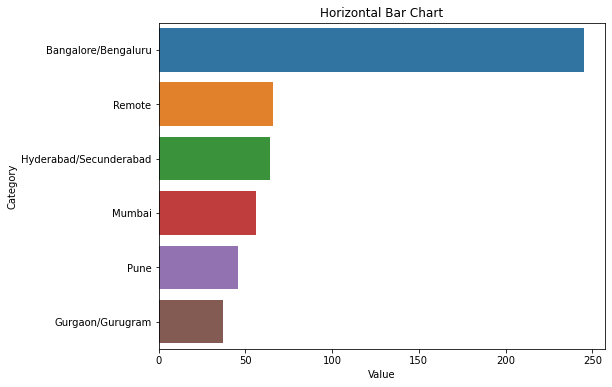

In [398]:

plt.figure(figsize=(8, 6))
sns.barplot(loc_jobs['job_count'], loc_jobs['Location'])
plt.xlabel('Value')
plt.ylabel('Category')
plt.title('Horizontal Bar Chart')
plt.show()

### Most common job titles   (Top 10)

In [367]:
job_titles_common = pd.DataFrame(df.Title.value_counts()[:10].reset_index()).rename(columns={'index':'Title','Title':'job_count'})
job_titles_common

,Title,job_count
0,Data Scientist,131
1,Data Analyst,107
2,Senior Data Scientist,33
3,Senior Data Analyst,29
4,Lead Data Scientist,17
5,Data Science Manager,12
6,Data Science Engineer,10
7,Data Science Professional,9
8,Lead Data Analyst,7
9,Sr. Data Scientist,6


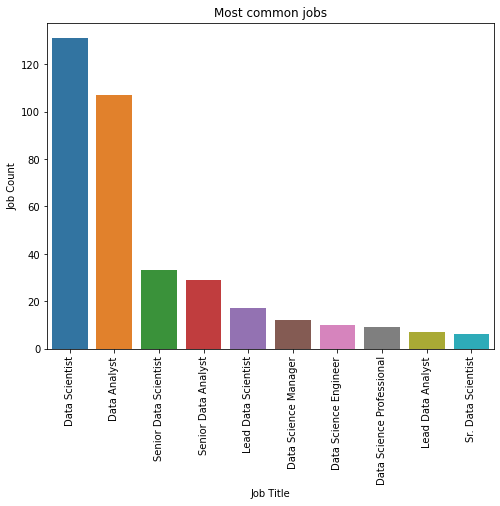

In [370]:
plt.figure(figsize=(8,6))

sns.barplot(data = job_titles_common, x='Title', y='job_count')
plt.ylabel('Job Count')
plt.xlabel('Job Title')
plt.xticks(rotation=90)
plt.title('Most common jobs')
plt.show()

##### Here we can see most of the jobs are for Data Scientist followed by Data Analyst

### Salary

In [237]:
 pd.DataFrame(df.Salary.value_counts())[:5]

,Salary
Not disclosed,810
Unpaid,13
20-35 Lacs PA,9
10-20 Lacs PA,6
12-20 Lacs PA,4


##### Most of the companies in the dataset doesnot disclose the salary offered

### Top 10 job offering companies

In [373]:
top_10_companies = df['Company Name'].value_counts()[:10] 
pd.DataFrame(top_10_companies)

,Company Name
Skillety,18
Siemens,13
Tiger Analytics,12
Coders Brain Pvt Ltd,11
Response Informatics,10
Deutsche Bank,7
TVS Motor,7
Aspyra Hr Services,7
Essenware,6
IBM,6


### Rating Distribution

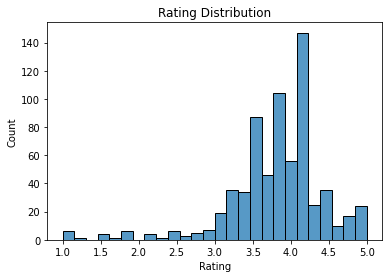

In [249]:
sns.histplot(df['Rating'].astype('float'))
plt.title('Rating Distribution')
plt.show()

##### Most of the companies have ratings between 3.5 to 4.5.

In [381]:
aa = df.min_exp.unique()
aa

array(['5', '12', '1', '7', '3', '8', '10', '3 months duration', '2', '4',
       '15', '0', '6', 'No fixed duration', '6 months duration', '11',
       '9', 'MS/M.Sc(Science), MCA, B.Tech/B.E.', '13', '16', '18 Nov',
       'Any Graduate', '1 month duration', '5 months duration'],
      dtype=object)

In [383]:
# filtering or the numeric values present in the min_exp column
numeric = []
for i in list(aa):
    try:
        if int(i):
            numeric.append(i)
    except:
        pass

In [384]:
numeric

['5',
 '12',
 '1',
 '7',
 '3',
 '8',
 '10',
 '2',
 '4',
 '15',
 '6',
 '11',
 '9',
 '13',
 '16']

In [385]:
# cleaning the dataframe for min_exp 
exp_filtered = df[df['min_exp'].isin(numeric)]


In [378]:
# converting the min_exp values to integer data type
from warnings import filterwarnings
filterwarnings('ignore')


exp_filtered['min_exp'] = exp_filtered.min_exp.astype('int')

In [379]:
# checking the unique values in the min_exp column
exp_filtered.min_exp.unique()

array([ 5, 12,  1,  7,  3,  8, 10,  2,  4, 15,  6, 11,  9, 13, 16])

In [386]:
# calculating the average of minimum job experience needed to apply for a particular job title

job_by_exp = exp_filtered.groupby(['Title'])['min_exp'].mean()

In [353]:
job_exp_df = job_by_exp.reset_index().sort_values(by='min_exp').reset_index(drop=True)

In [354]:
job_exp_df

,Title,min_exp
0,Research Associate - Data Analytics (Business ...,1.0
1,Consultant - Data Science DT,1.0
2,Online Data Analyst India,1.0
3,Data science,1.0
4,Data science with Statistics Professional,1.0
...,...,...
470,Director - DATA & Analytics,15.0
471,Senior Principal Data & Analytics Platform Arc...,15.0
472,Data Analytics Manager - II,15.0
473,Data Architecture Principles Analytics and Mod...,15.0


In [361]:
analyst_scientist = job_exp_df[(job_exp_df['Title'] == 'Data Scientist') | (job_exp_df['Title'] == 'Data Analyst')]
analyst_scientist

,Title,min_exp
127,Data Analyst,2.554217
203,Data Scientist,3.798387


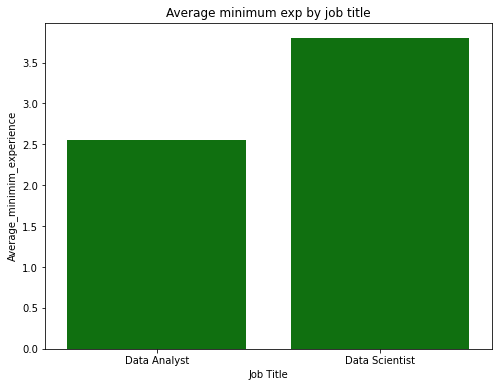

In [389]:
plt.figure(figsize=(8,6))

sns.barplot(data = analyst_scientist, x='Title', y='min_exp', color='green')
plt.ylabel('Average_minimim_experience')
plt.xlabel('Job Title')
plt.title('Average minimum exp by job title')
plt.show()

##### Here We can easily conclude that on an average minimum job experience needed for Data Analyst is around 2.5years but for Data Scientist jobs applicant needs 3.5 years of experience


##### This means Data Scientists needs more experience than Data analyst job roles 